In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('credit_cards.csv')

In [2]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,17270,130000,2,2,1,34,0,0,0,0,...,105478,107725,109994,3700,5300,4000,4000,4000,6100,0
1,22364,290000,2,1,2,27,-1,-1,0,0,...,1503,834,931,569,1000,1000,200,265,500,0
2,23880,360000,1,1,2,27,-2,-2,-2,-2,...,1390,-5,-5,898,5970,1396,0,0,0,0
3,9074,110000,2,1,2,35,-1,2,-1,0,...,790,806,1729,0,1166,0,446,1729,0,0
4,25083,260000,1,3,1,48,0,0,0,0,...,155059,141570,134143,8000,6000,7100,5300,5000,5000,0


In [3]:
# If there is a missing value
data.isnull().values.any()

False

In [4]:
# Sum of numbers of total missing values
data.isnull().sum().sum()

0

In [5]:
# Numbers of missing values in each column
data.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

In [6]:
# Testing if a specitic attribute has missing values
data['ID'].isnull()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
23970    False
23971    False
23972    False
23973    False
23974    False
23975    False
23976    False
23977    False
23978    False
23979    False
23980    False
23981    False
23982    False
23983    False
23984    False
23985    False
23986    False
23987    False
23988    False
23989    False
23990    False
23991    False
23992    False
23993    False
23994    False
23995    False
23996    False
23997    False
23998    False
23999    False
Name: ID, Length: 24000, dtype: bool

In [7]:
data.groupby('DEFAULT').DEFAULT.count()

DEFAULT
0    18633
1     5367
Name: DEFAULT, dtype: int64

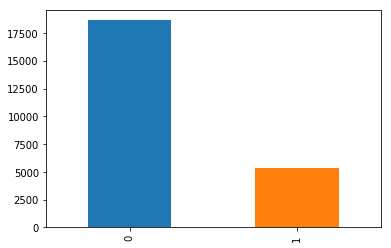

In [8]:
data['DEFAULT'].value_counts().plot(kind='bar')

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import sklearn.feature_selection as sel

In [10]:
data = pd.read_csv('credit_cards.csv')

In [11]:
chi_array = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [12]:
chi_result = sel.chi2(np.array(data[chi_array])+3, data['DEFAULT'])

In [13]:
chi_feature_rank = sorted(zip(list(chi_result[0]), chi_array))

In [14]:
chi_feature_rank

[(0.6364555205901261, 'MARRIAGE'),
 (2.3258176071724934, 'SEX'),
 (3.0397194906805876, 'EDUCATION'),
 (423.4020843314684, 'PAY_6'),
 (486.7422574961719, 'PAY_5'),
 (574.7819781137598, 'PAY_4'),
 (682.0954891435423, 'PAY_3'),
 (849.8185052885542, 'PAY_2'),
 (1071.137020968935, 'PAY_1')]

In [15]:
mi_array = ['AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
            'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 
            'PAY_AMT5', 'PAY_AMT6']

In [16]:
mi_result = sel.mutual_info_classif(np.array(data[mi_array]), data['DEFAULT'], random_state = 0)

In [17]:
mi_feature_rank = sorted(zip(mi_result, mi_array))

In [18]:
mi_feature_rank

[(0.0, 'AGE'),
 (0.004241436677838273, 'BILL_AMT3'),
 (0.005733184342526121, 'BILL_AMT4'),
 (0.00660286777095731, 'BILL_AMT5'),
 (0.007637285659684689, 'BILL_AMT6'),
 (0.008837007347356929, 'BILL_AMT1'),
 (0.009260307833560466, 'BILL_AMT2'),
 (0.013255444938498506, 'PAY_AMT6'),
 (0.014164786733995127, 'PAY_AMT5'),
 (0.0157404664444889, 'PAY_AMT2'),
 (0.018206342776817097, 'PAY_AMT4'),
 (0.020687431010701696, 'PAY_AMT3'),
 (0.02573378715055652, 'PAY_AMT1')]

In [19]:
def attribute_value(data, attribute):
    result = set()
    for i in data[attribute].values:
        result.add(i)
    result = sorted(list(result))
    return result
def print_bar(data, attribute, x_label, y_label):
    d0 = [i[1] for i in data[['DEFAULT', attribute]].values if i[0] == 0]
    d1 = [i[1] for i in data[['DEFAULT', attribute]].values if i[0] == 1]
    plt.grid(True)
    plt.bar(attribute_value(data, attribute), [d0.count(i) for i in attribute_value(data, attribute)])
    plt.bar(attribute_value(data, attribute), [d1.count(i) for i in attribute_value(data, attribute)], 
            bottom = [d0.count(i) for i in attribute_value(data, attribute)])
    plt.legend(['DEFAULT: No', 'DEFAULT: Yes'])
    plt.title(attribute)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

Highest Ranked Categorical Features Distribution


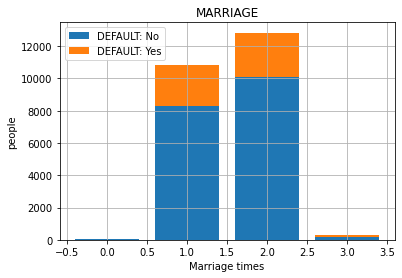

In [20]:
print('Highest Ranked Categorical Features Distribution')
print_bar(data, 'MARRIAGE', 'Marriage times', 'people')

Second Highest Ranked Categorical Features Distribution


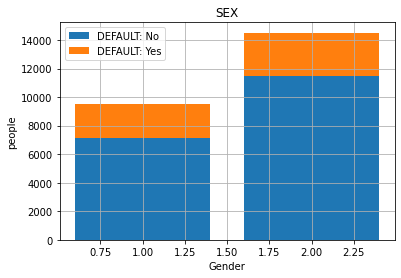

In [21]:
print('Second Highest Ranked Categorical Features Distribution')
print_bar(data, 'SEX', 'Gender', 'people')

Third Highest Ranked Categorical Features Distribution


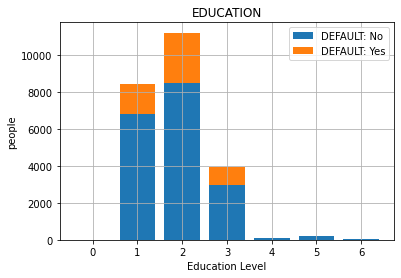

In [22]:
print('Third Highest Ranked Categorical Features Distribution')
print_bar(data, 'EDUCATION', 'Education Level', 'people')

Lowest Ranked Categorical Features Distribution


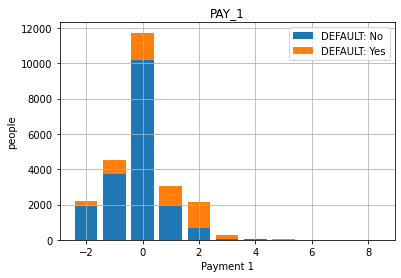

In [23]:
print('Lowest Ranked Categorical Features Distribution')
print_bar(data, 'PAY_1', 'Payment 1', 'people')

Second Lowest Ranked Categorical Features Distribution


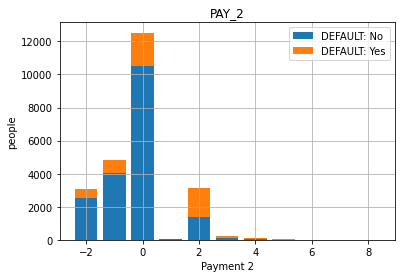

In [57]:
print('Second Lowest Ranked Categorical Features Distribution')
print_bar(data, 'PAY_2', 'Payment 2', 'people')

Third Lowest Ranked Categorical Features Distribution


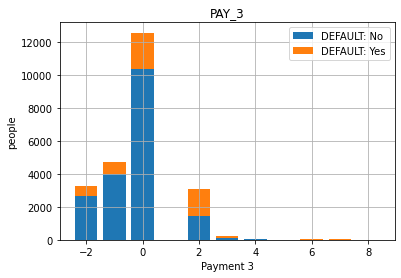

In [58]:
print('Third Lowest Ranked Categorical Features Distribution')
print_bar(data, 'PAY_3', 'Payment 3', 'people')

In [66]:
def print_hist(data,attribute, x_label, y_label):
    d0 = [i[1] for i in data[['DEFAULT', attribute]].values if i[0] == 0]
    d1 = [i[1] for i in data[['DEFAULT', attribute]].values if i[0] == 1]
    bins = np.linspace(min(data[attribute].values), max(data[attribute].values), 10)
    plt.grid(True)
    plt.hist([d0, d1],bins,label=['0', '1'])
    ax = plt.gca()
    ax.get_xaxis().get_major_formatter().set_scientific(0)
    plt.legend(['Default: Yes','Default: No'])
    plt.title(attribute)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

Highest Ranked Numerical Features Distribution


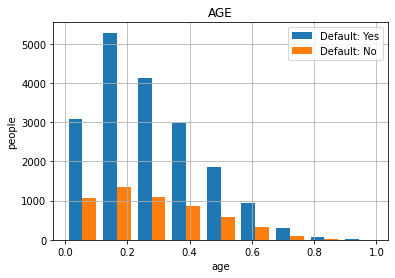

In [67]:
print('Highest Ranked Numerical Features Distribution')
print_hist(data,'AGE', 'age', 'people')

Second Highest Ranked Numerical Features Distribution


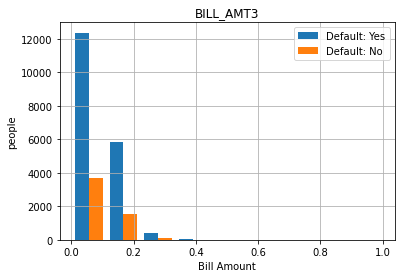

In [68]:
print('Second Highest Ranked Numerical Features Distribution')
print_hist(data,'BILL_AMT3', 'Bill Amount', 'people')

Third Highest Ranked Numerical Features Distribution


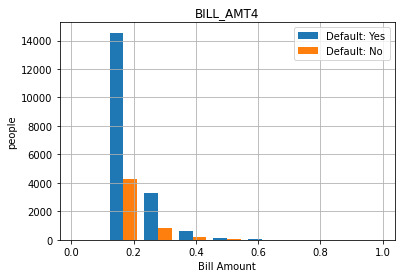

In [69]:
print('Third Highest Ranked Numerical Features Distribution')
print_hist(data,'BILL_AMT4', 'Bill Amount', 'people')

Lowest Ranked Numerical Features Distribution


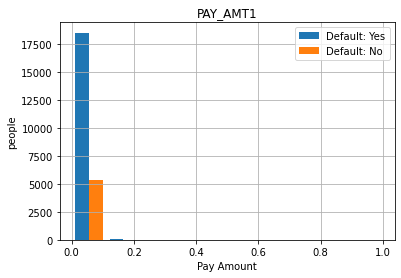

In [70]:
print('Lowest Ranked Numerical Features Distribution')
print_hist(data,'PAY_AMT1', 'Pay Amount', 'people')

Second Lowest Ranked Numerical Features Distribution


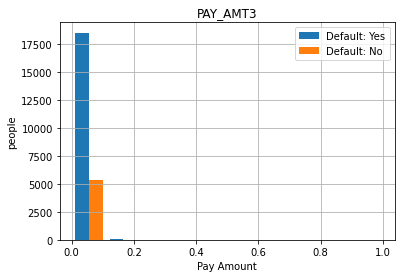

In [71]:
print('Second Lowest Ranked Numerical Features Distribution')
print_hist(data,'PAY_AMT3', 'Pay Amount', 'people')

Third Lowest Ranked Numerical Features Distribution


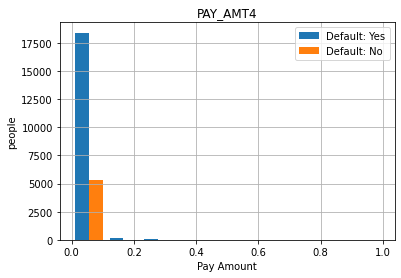

In [72]:
print('Third Lowest Ranked Numerical Features Distribution')
print_hist(data,'PAY_AMT4', 'Pay Amount', 'people')

In [73]:
data['TOTAL_BILL_AMT'] = data['BILL_AMT1'] + data['BILL_AMT2'] + data['BILL_AMT3'] + data['BILL_AMT4'] + data['BILL_AMT5'] + data['BILL_AMT6']

In [34]:
print(data[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'TOTAL_BILL_AMT']].head())

   BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
0      99891     101032     104705     105478     107725     109994   
1        168        569       1401       1503        834        931   
2       2807        894       5939       1390         -5         -5   
3        549        179       1166        790        806       1729   
4     154927     158848     160654     155059     141570     134143   

   TOTAL_BILL_AMT  
0          628825  
1            5406  
2           11020  
3            5219  
4          905201  


In [35]:
data['TOTAL_PAY_AMT'] = data['PAY_AMT1'] + data['PAY_AMT2'] + data['PAY_AMT3'] + data['PAY_AMT4'] + data['PAY_AMT5'] + data['PAY_AMT6']

In [36]:
print(data[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'TOTAL_PAY_AMT']].head())

   PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  TOTAL_PAY_AMT
0      3700      5300      4000      4000      4000      6100          27100
1       569      1000      1000       200       265       500           3534
2       898      5970      1396         0         0         0           8264
3         0      1166         0       446      1729         0           3341
4      8000      6000      7100      5300      5000      5000          36400


In [37]:
TOTAL_BILL_AMT = data['TOTAL_BILL_AMT']
TOTAL_PAY_AMT = data['TOTAL_PAY_AMT']

In [38]:
bill_pay_relation = pd.DataFrame({
    'TOTAL_BILL_AMT' : TOTAL_BILL_AMT,
    'TOTAL_PAY_AMT' : TOTAL_PAY_AMT})

In [39]:
correlation = TOTAL_BILL_AMT.corr(TOTAL_PAY_AMT)

In [40]:
correlation

0.3467818507428473

In [41]:
print('Old range of AGE: ')
print(min(data['AGE'].values), max(data['AGE'].values))
data['AGE'] = (data['AGE'] - data['AGE'].min()) / (data['AGE'].max() - data['AGE'].min())
print('New range of AGE: ')
print(min(data['AGE'].values), max(data['AGE'].values))

Old range of AGE: 
21 75
New range of AGE: 
0.0 1.0


In [42]:
print('Old range of LIMIT_BAL: ')
print(min(data['LIMIT_BAL'].values), max(data['LIMIT_BAL'].values))
data['LIMIT_BAL'] = (data['LIMIT_BAL'] - data['LIMIT_BAL'].min()) / (data['LIMIT_BAL'].max() - data['LIMIT_BAL'].min())
print('New range of LIMIT_BAL: ')
print(min(data['LIMIT_BAL'].values), max(data['LIMIT_BAL'].values))

Old range of LIMIT_BAL: 
10000 1000000
New range of LIMIT_BAL: 
0.0 1.0


In [43]:
print('Old range of BILL_AMT1: ')
print(min(data['BILL_AMT1'].values), max(data['BILL_AMT1'].values))
data['BILL_AMT1'] = (data['BILL_AMT1'] - data['BILL_AMT1'].min()) / (data['BILL_AMT1'].max() - data['BILL_AMT1'].min())
print('New range of BILL_AMT1: ')
print(min(data['BILL_AMT1'].values), max(data['BILL_AMT1'].values))


Old range of BILL_AMT1: 
-154973 964511
New range of BILL_AMT1: 
0.0 1.0


In [44]:
print('Old range of BILL_AMT2: ')
print(min(data['BILL_AMT2'].values), max(data['BILL_AMT2'].values))
data['BILL_AMT2'] = (data['BILL_AMT2'] - data['BILL_AMT2'].min()) / (data['BILL_AMT2'].max() - data['BILL_AMT2'].min())
print('New range of BILL_AMT2: ')
print(min(data['BILL_AMT2'].values), max(data['BILL_AMT1'].values))

Old range of BILL_AMT2: 
-69777 983931
New range of BILL_AMT2: 
0.0 1.0


In [45]:
print('Old range of BILL_AMT3: ')
print(min(data['BILL_AMT3'].values), max(data['BILL_AMT3'].values))
data['BILL_AMT3'] = (data['BILL_AMT3'] - data['BILL_AMT3'].min()) / (data['BILL_AMT3'].max() - data['BILL_AMT3'].min())
print('New range of BILL_AMT3: ')
print(min(data['BILL_AMT3'].values), max(data['BILL_AMT3'].values))

Old range of BILL_AMT3: 
-157264 1664089
New range of BILL_AMT3: 
0.0 1.0


In [46]:
print('Old range of BILL_AMT4: ')
print(min(data['BILL_AMT4'].values), max(data['BILL_AMT4'].values))
data['BILL_AMT4'] = (data['BILL_AMT4'] - data['BILL_AMT4'].min()) / (data['BILL_AMT4'].max() - data['BILL_AMT4'].min())
print('New range of BILL_AMT4: ')
print(min(data['BILL_AMT4'].values), max(data['BILL_AMT4'].values))

Old range of BILL_AMT4: 
-170000 891586
New range of BILL_AMT4: 
0.0 1.0


In [47]:
print('Old range of BILL_AMT5: ')
print(min(data['BILL_AMT5'].values), max(data['BILL_AMT5'].values))
data['BILL_AMT5'] = (data['BILL_AMT5'] - data['BILL_AMT5'].min()) / (data['BILL_AMT5'].max() - data['BILL_AMT5'].min())
print('New range of BILL_AMT5: ')
print(min(data['BILL_AMT5'].values), max(data['BILL_AMT5'].values))

Old range of BILL_AMT5: 
-81334 927171
New range of BILL_AMT5: 
0.0 1.0


In [48]:
print('Old range of BILL_AMT6: ')
print(min(data['BILL_AMT6'].values), max(data['BILL_AMT6'].values))
data['BILL_AMT6'] = (data['BILL_AMT6'] - data['BILL_AMT6'].min()) / (data['BILL_AMT6'].max() - data['BILL_AMT6'].min())
print('New range of BILL_AMT6: ')
print(min(data['BILL_AMT6'].values), max(data['BILL_AMT6'].values))

Old range of BILL_AMT6: 
-339603 961664
New range of BILL_AMT6: 
0.0 1.0


In [49]:
print('Old range of PAY_AMT1: ')
print(min(data['PAY_AMT1'].values), max(data['PAY_AMT1'].values))
data['PAY_AMT1'] = (data['PAY_AMT1'] - data['PAY_AMT1'].min()) / (data['PAY_AMT1'].max() - data['PAY_AMT1'].min())
print('New range of PAY_AMT1: ')
print(min(data['PAY_AMT1'].values), max(data['PAY_AMT1'].values))

Old range of PAY_AMT1: 
0 873552
New range of PAY_AMT1: 
0.0 1.0


In [50]:
print('Old range of PAY_AMT2: ')
print(min(data['PAY_AMT2'].values), max(data['PAY_AMT2'].values))
data['PAY_AMT2'] = (data['PAY_AMT2'] - data['PAY_AMT2'].min()) / (data['PAY_AMT2'].max() - data['PAY_AMT2'].min())
print('New range of PAY_AMT2: ')
print(min(data['PAY_AMT2'].values), max(data['PAY_AMT2'].values))

Old range of PAY_AMT2: 
0 1684259
New range of PAY_AMT2: 
0.0 1.0


In [51]:
print('Old range of PAY_AMT3: ')
print(min(data['PAY_AMT3'].values), max(data['PAY_AMT3'].values))
data['PAY_AMT3'] = (data['PAY_AMT3'] - data['PAY_AMT3'].min()) / (data['PAY_AMT3'].max() - data['PAY_AMT3'].min())
print('New range of PAY_AMT3: ')
print(min(data['PAY_AMT3'].values), max(data['PAY_AMT3'].values))

Old range of PAY_AMT3: 
0 896040
New range of PAY_AMT3: 
0.0 1.0


In [52]:
print('Old range of PAY_AMT4: ')
print(min(data['PAY_AMT4'].values), max(data['PAY_AMT4'].values))
data['PAY_AMT4'] = (data['PAY_AMT4'] - data['PAY_AMT4'].min()) / (data['PAY_AMT4'].max() - data['PAY_AMT4'].min())
print('New range of PAY_AMT4: ')
print(min(data['PAY_AMT4'].values), max(data['PAY_AMT4'].values))

Old range of PAY_AMT4: 
0 621000
New range of PAY_AMT4: 
0.0 1.0


In [53]:
print('Old range of PAY_AMT5: ')
print(min(data['PAY_AMT5'].values), max(data['PAY_AMT5'].values))
data['PAY_AMT5'] = (data['PAY_AMT5'] - data['PAY_AMT5'].min()) / (data['PAY_AMT5'].max() - data['PAY_AMT5'].min())
print('New range of PAY_AMT5: ')
print(min(data['PAY_AMT5'].values), max(data['PAY_AMT5'].values))

Old range of PAY_AMT5: 
0 426529
New range of PAY_AMT5: 
0.0 1.0


In [54]:
print('Old range of PAY_AMT6: ')
print(min(data['PAY_AMT6'].values), max(data['PAY_AMT6'].values))
data['PAY_AMT6'] = (data['PAY_AMT6'] - data['PAY_AMT6'].min()) / (data['PAY_AMT6'].max() - data['PAY_AMT6'].min())
print('New range of PAY_AMT6: ')
print(min(data['PAY_AMT6'].values), max(data['PAY_AMT6'].values))

Old range of PAY_AMT6: 
0 528666
New range of PAY_AMT6: 
0.0 1.0


In [55]:
def value(data, attribute):
    result = set()
    for i in data[attribute].values:
        result.add(i)
    result = sorted(list(result))
    return result
def one_hot_represetation(data,attribute):
    for i in value(data,attribute):
        data[attribute + '_number_' + str(i)] = [1 if j!=i else 0 for j in data[attribute].values]
        print(attribute + '_number_' + str(i), ': ', 
        list(data[attribute + '_number_' + str(i)].values).count(0))

In [56]:
one_hot_represetation(data,'MARRIAGE')
one_hot_represetation(data,'EDUCATION')
one_hot_represetation(data,'SEX')
one_hot_represetation(data,'PAY_1')
one_hot_represetation(data,'PAY_2')
one_hot_represetation(data,'PAY_3')
one_hot_represetation(data,'PAY_4')
one_hot_represetation(data,'PAY_5')
one_hot_represetation(data,'PAY_6')

MARRIAGE_number_0 :  45
MARRIAGE_number_1 :  10856
MARRIAGE_number_2 :  12832
MARRIAGE_number_3 :  267
EDUCATION_number_0 :  11
EDUCATION_number_1 :  8450
EDUCATION_number_2 :  11227
EDUCATION_number_3 :  3958
EDUCATION_number_4 :  102
EDUCATION_number_5 :  217
EDUCATION_number_6 :  35
SEX_number_1 :  9488
SEX_number_2 :  14512
PAY_1_number_-2 :  2224
PAY_1_number_-1 :  4513
PAY_1_number_0 :  11737
PAY_1_number_1 :  3033
PAY_1_number_2 :  2126
PAY_1_number_3 :  254
PAY_1_number_4 :  58
PAY_1_number_5 :  23
PAY_1_number_6 :  8
PAY_1_number_7 :  7
PAY_1_number_8 :  17
PAY_2_number_-2 :  3067
PAY_2_number_-1 :  4831
PAY_2_number_0 :  12525
PAY_2_number_1 :  26
PAY_2_number_2 :  3162
PAY_2_number_3 :  254
PAY_2_number_4 :  85
PAY_2_number_5 :  21
PAY_2_number_6 :  10
PAY_2_number_7 :  18
PAY_2_number_8 :  1
PAY_3_number_-2 :  3292
PAY_3_number_-1 :  4748
PAY_3_number_0 :  12563
PAY_3_number_1 :  3
PAY_3_number_2 :  3067
PAY_3_number_3 :  204
PAY_3_number_4 :  61
PAY_3_number_5 :  17
PAY_3_